### Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [436]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
  

In [351]:
df=pd.read_csv(r'C:\Users\anand\Downloads\avocado.csv')

In [352]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [353]:
type(df)

pandas.core.frame.DataFrame

In [354]:
#columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [355]:
#droping unnamed column
df.drop('Unnamed: 0',inplace=True,axis=1)

In [356]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [357]:
df.tail(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [358]:
df.sample(9)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7138,2017-04-09,1.75,1277721.97,37746.37,775729.89,2839.80,461405.91,407168.08,51164.80,3073.03,conventional,2017,NewYork
17257,2017-07-09,2.20,4236.47,358.58,1807.52,16.68,2053.69,37.23,2016.46,0.00,organic,2017,Spokane
8880,2018-02-11,0.64,1490711.97,793896.21,256987.03,12607.40,427221.33,241681.63,179607.48,5932.22,conventional,2018,PhoenixTucson
17749,2018-02-25,1.39,36823.42,8387.30,751.32,24.81,27659.99,26783.45,876.54,0.00,organic,2018,Denver
5334,2016-05-29,0.80,245482.03,71157.19,9858.50,210.80,164255.54,150822.59,13401.63,31.32,conventional,2016,StLouis
17713,2018-02-25,1.78,15097.80,736.69,4538.31,0.00,9822.80,2275.92,7546.88,0.00,organic,2018,CincinnatiDayton
14824,2017-06-04,1.44,20445.39,1464.32,5926.88,0.00,13054.19,2610.58,10443.61,0.00,organic,2017,Atlanta
3265,2016-03-13,1.00,823796.56,39540.49,569733.57,125901.94,88620.56,86428.90,2191.66,0.00,conventional,2016,Chicago
3484,2016-12-25,1.06,319957.45,89825.00,59758.69,7121.96,163251.80,161040.94,2191.64,19.22,conventional,2016,Detroit


In [359]:
#shape of dataframe
df.shape

(18249, 13)

In [360]:
#type of dataframe
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

## Null values

In [361]:
df.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False


In [362]:
df.isnull().sum().sum()

0

In [363]:
df.isnull().values.any()

False

In [364]:
#how many avocado sell in last 4 years
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [365]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Data visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

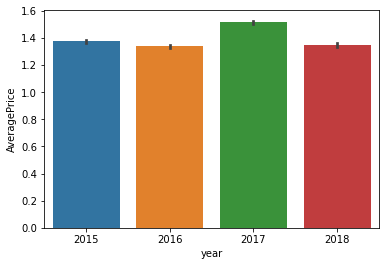

In [366]:
#Bar plot
sns.barplot(x="year",y="AveragePrice",data=df)

### From above we came to know that:
    Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

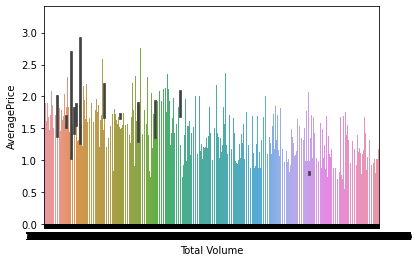

In [367]:
sns.barplot(x="Total Volume",y="AveragePrice",data=df)

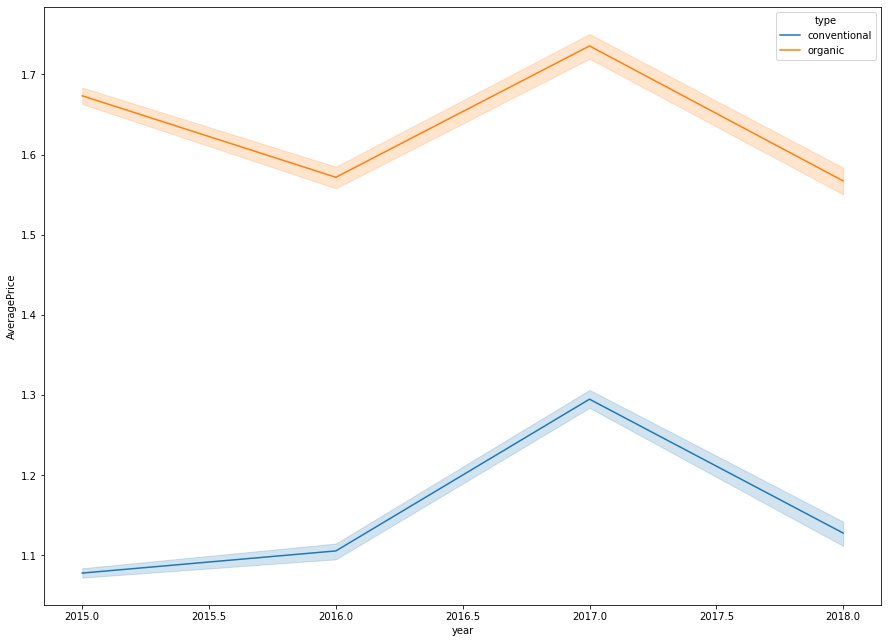

In [368]:
plt.figure(figsize=(15,11))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)
plt.show()

#### From above graph:

There is hike in 2017 of both type of avocado both for conventional and organic type of avocado.
Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

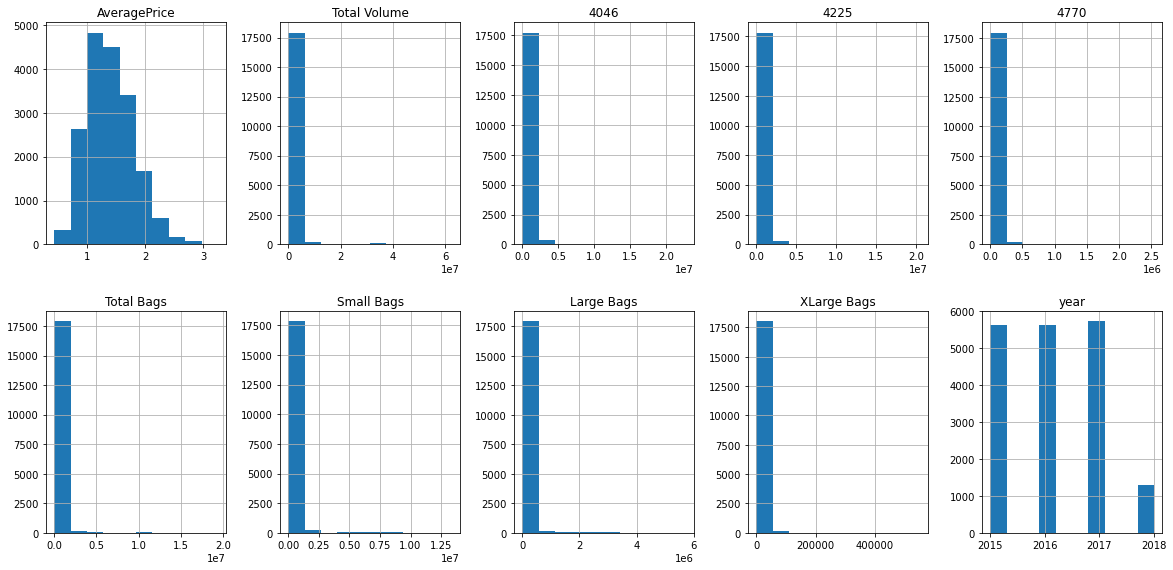

In [369]:
df.hist(figsize=(20,20,),grid=True,layout=(4,5),bins=10)

###### Average price column is normally distributing over the histogram.

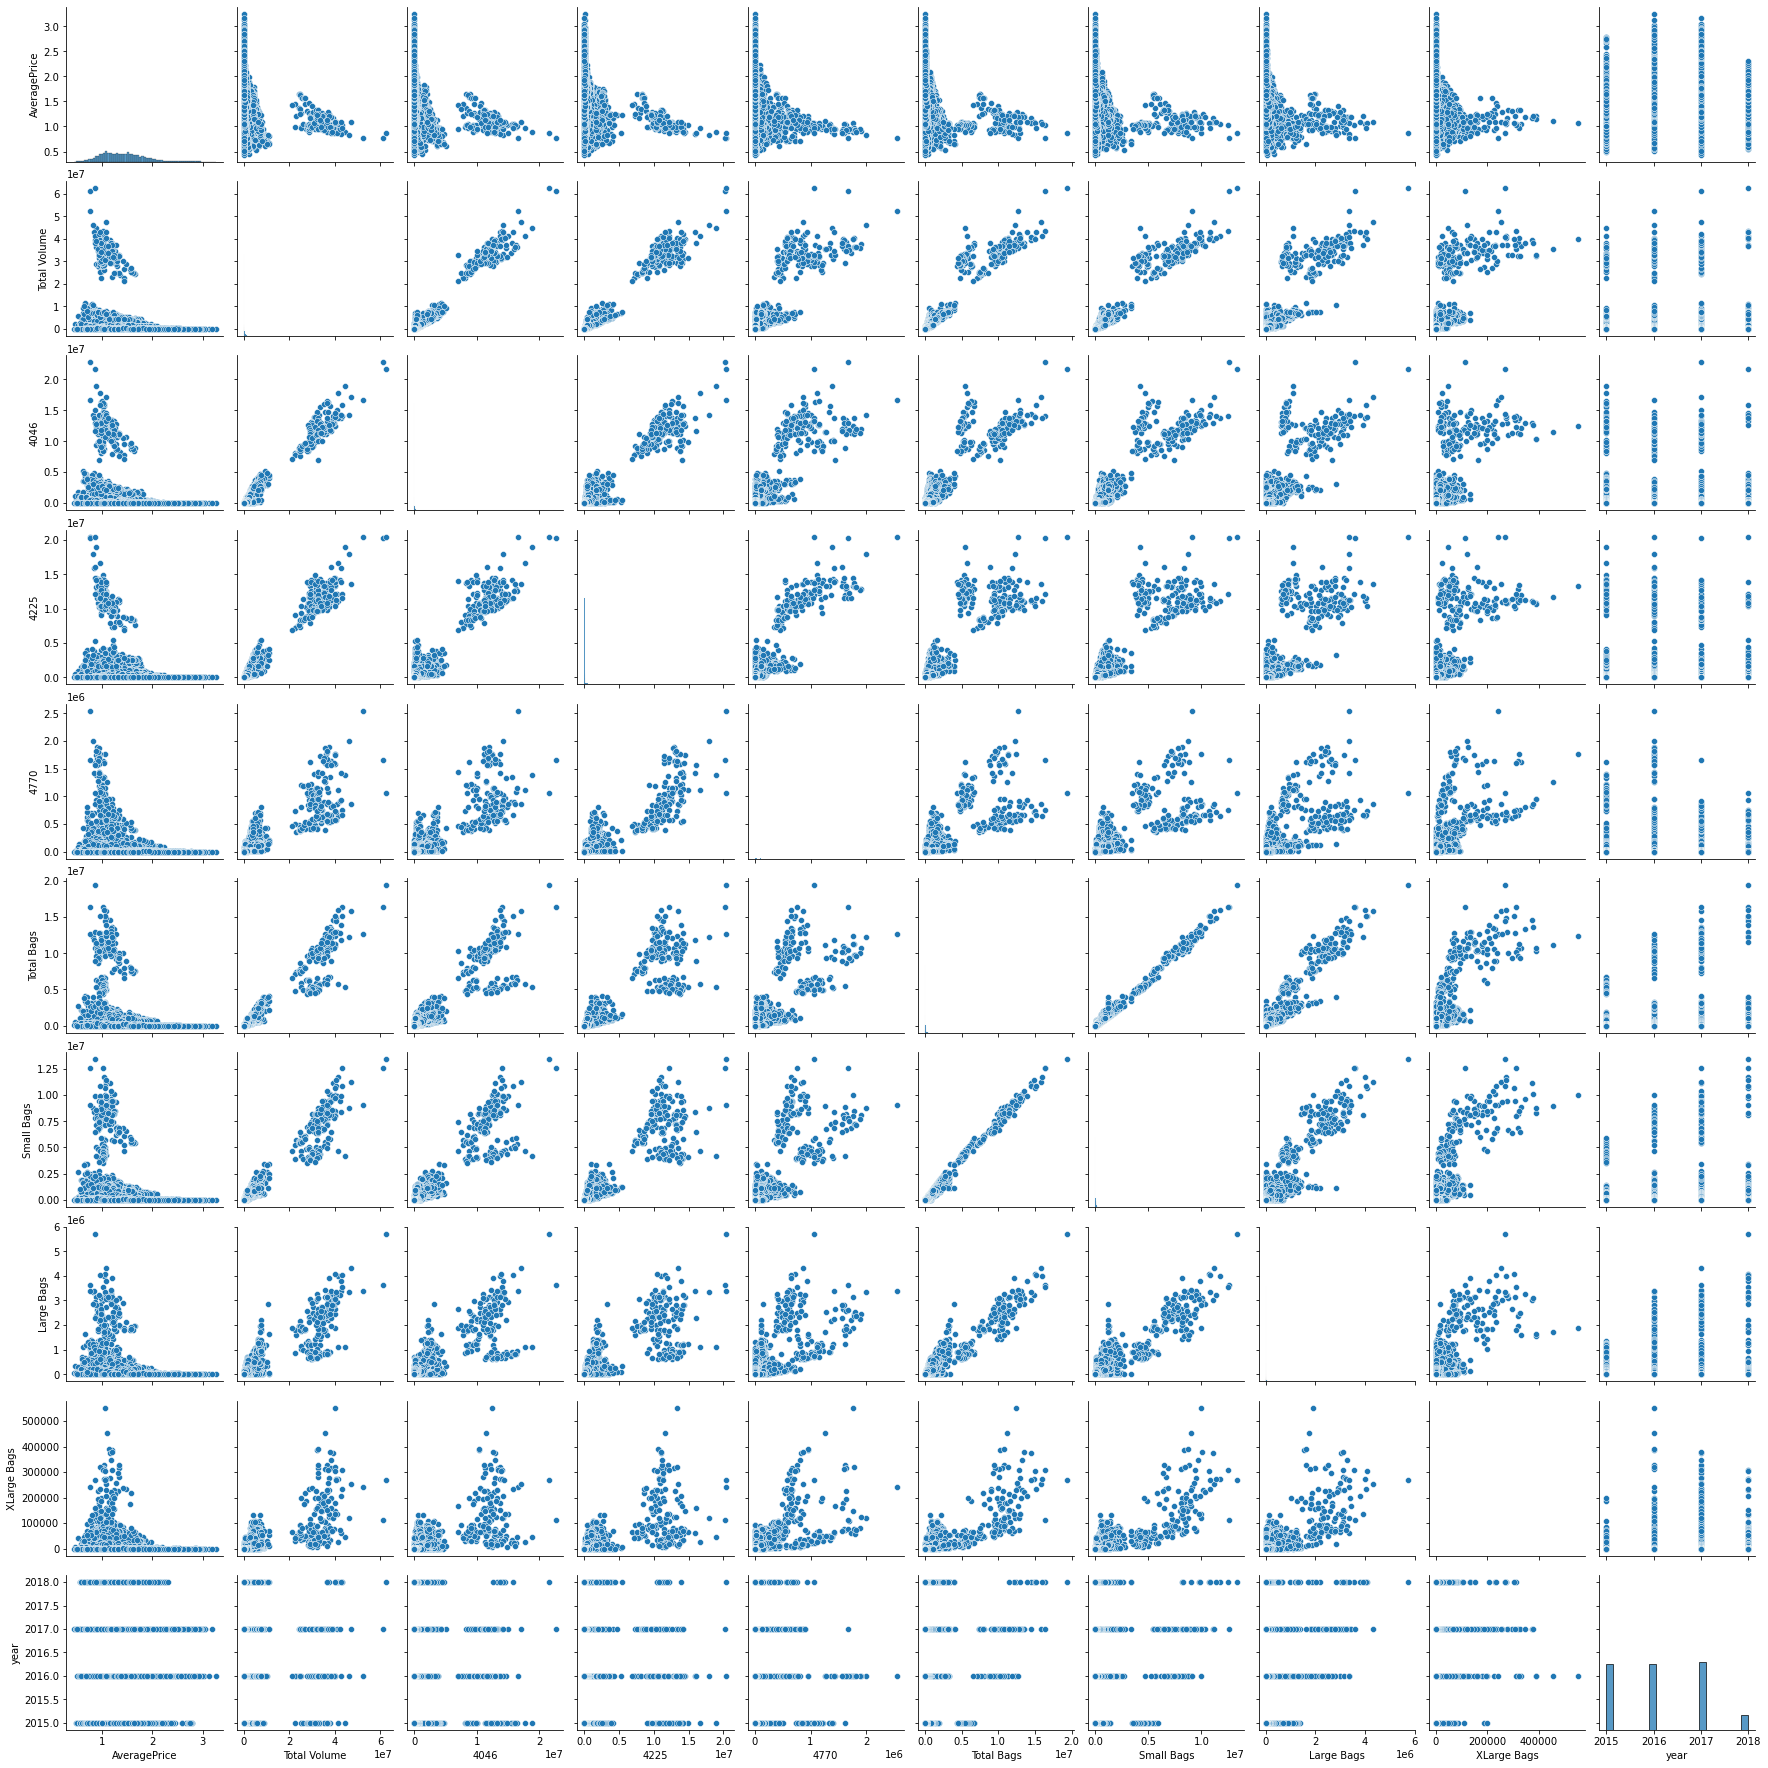

In [370]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

### correlation

In [371]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [372]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

<AxesSubplot:>

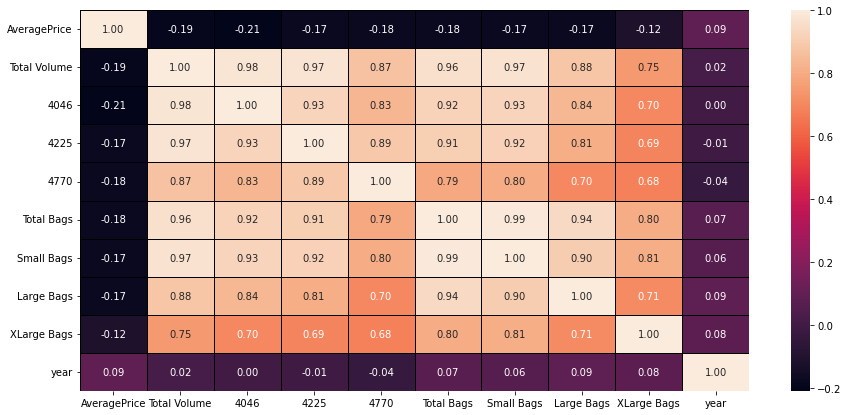

In [373]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

###### maximum correlated=Total volume
minimum correlation=year

## Discriptive statstics

### Describing datasets:

In [374]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


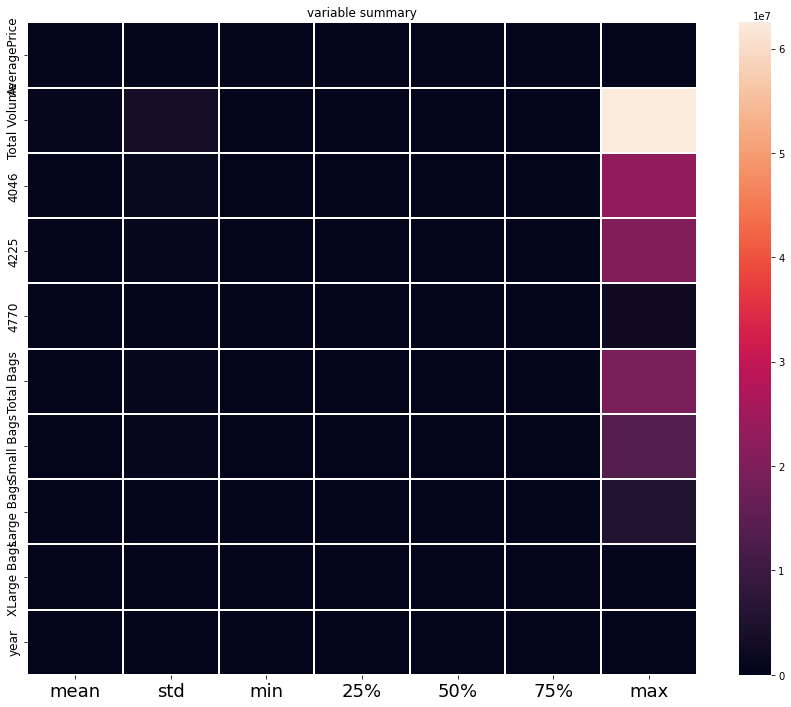

In [375]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=False,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.savefig('heatmap.png')
plt.show()

##### outcome of describe datasets:
    rows=18249
    columns=10
AveragePrice:
    1.mean=1.405978
    2.std=0.402677
    3.max_value=3.250000
    4.min_value=0.440000
TotalVolume:
    1.mean=8.506440
    2.std=3.453545
    3.max_value=6.250565
    4.min_value=8.456000


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


## skewness:

In [377]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

###### Making the skewness value near to zero will help to get better score.

In [378]:
skew=('Total Volume','4046','4225','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

### Outliers Checking:
##### For avocado problem first check the outliers of each column

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

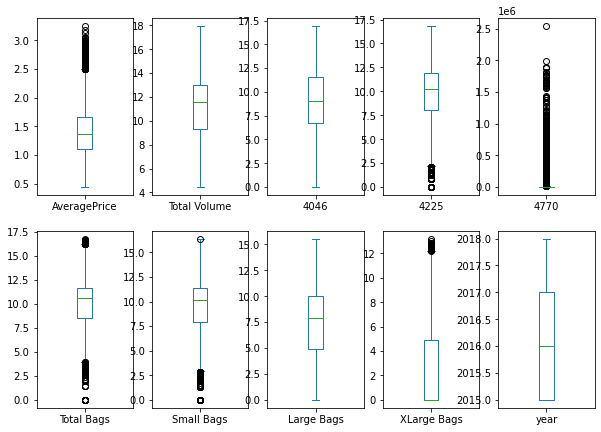

In [379]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,15))

##### there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

### Normal distribution curve:

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

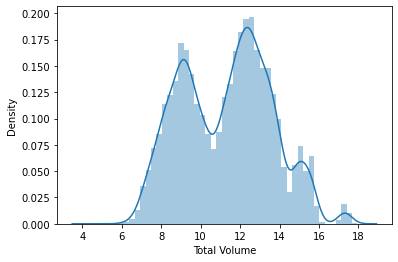

In [380]:
sns.distplot(df["Total Volume"])

###### data is not normal distributed

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

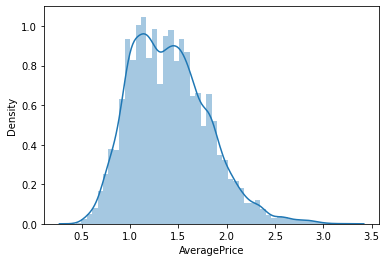

In [381]:
sns.distplot(df["AveragePrice"])

###### data is not normalisd

In [382]:
import scipy.stats as stats
from scipy.stats import zscore


In [383]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [384]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,11.070344,6.944801,10.905146,48.16,9.070833,9.060055,4.545951,0.0,conventional,2015,Albany
1,2015-12-20,1.35,10.912867,6.515127,10.706381,58.33,9.159737,9.149429,4.589955,0.0,conventional,2015,Albany
2,2015-12-13,0.93,11.680313,6.679222,11.600485,130.50,9.005325,8.992584,4.645736,0.0,conventional,2015,Albany
3,2015-12-06,1.08,11.277116,7.032624,11.184108,72.58,8.667708,8.644425,4.903495,0.0,conventional,2015,Albany
4,2015-11-29,1.28,10.840377,6.848515,10.688288,75.78,8.729874,8.697389,5.291746,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,9.745419,7.624599,7.333154,0.00,9.510421,9.477908,6.070391,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,9.538855,7.083975,8.141044,0.00,9.134090,9.098407,5.786284,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,9.530085,7.084159,7.805389,727.94,9.147945,9.143431,3.768384,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,9.693150,7.332127,8.000363,727.01,9.302969,9.298401,3.931826,0.0,organic,2018,WestTexNewMexico


## Encoding

In [385]:
label_encoder = preprocessing.LabelEncoder()
df['Date']= label_encoder.fit_transform(df['Date'])
  
df['Date'].unique()


array([ 51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0,
       103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
       156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144,
       143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131,
       130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118,
       117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105,
       104, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157])

In [386]:
df['region']= label_encoder.fit_transform(df['region'])
  
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [387]:
df['type']= label_encoder.fit_transform(df['type'])
  
df['type'].unique()

array([0, 1])

## Removing outliers

In [390]:
z= np.abs(zscore(df))
z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.676360,0.188689,0.107282,0.609752,0.374936,0.212091,0.494074,0.247796,0.669747,0.645526,0.999836,1.221282,1.700252
1,0.696857,0.139020,0.175949,0.737707,0.305200,0.211997,0.454761,0.213093,0.658279,0.645526,0.999836,1.221282,1.700252
2,0.717355,1.182069,0.158690,0.688840,0.618892,0.211325,0.523041,0.273995,0.643743,0.645526,0.999836,1.221282,1.700252
3,0.737853,0.809551,0.017121,0.583598,0.472808,0.211864,0.672335,0.409182,0.576571,0.645526,0.999836,1.221282,1.700252
4,0.758350,0.312861,0.207558,0.638425,0.298852,0.211834,0.644845,0.388616,0.475393,0.645526,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,0.685006,0.407310,0.878279,0.212540,0.299689,0.085548,0.272479,0.645526,1.000164,1.970504,1.700811
18245,1.557874,0.755023,0.775077,0.568306,0.594835,0.212540,0.466102,0.232904,0.346517,0.645526,1.000164,1.970504,1.700811
18246,1.537376,1.152375,0.778901,0.568251,0.712597,0.205766,0.459975,0.215422,0.872380,0.645526,1.000164,1.970504,1.700811
18247,1.516879,1.301382,0.707798,0.494407,0.644192,0.205774,0.391424,0.155249,0.829787,0.645526,1.000164,1.970504,1.700811


In [391]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(18249, 13)


In [392]:
df_new=df[(z<3).all(axis=1)]

In [393]:
print(df.shape)
print(df_new.shape)
df=df_new
print('after removing outliers',df.shape)

(18249, 13)
(17581, 13)
after removing outliers (17581, 13)


### percentage data loss

In [394]:
loss_percentage=(18249-17581)/18249*100
print(loss_percentage,'%')

3.660474546550496 %


In [395]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,11.070344,6.944801,10.905146,48.16,9.070833,9.060055,4.545951,0.0,0,2015,0
1,50,1.35,10.912867,6.515127,10.706381,58.33,9.159737,9.149429,4.589955,0.0,0,2015,0
2,49,0.93,11.680313,6.679222,11.600485,130.50,9.005325,8.992584,4.645736,0.0,0,2015,0
3,48,1.08,11.277116,7.032624,11.184108,72.58,8.667708,8.644425,4.903495,0.0,0,2015,0
4,47,1.28,10.840377,6.848515,10.688288,75.78,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,9.745419,7.624599,7.333154,0.00,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,160,1.71,9.538855,7.083975,8.141044,0.00,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,159,1.87,9.530085,7.084159,7.805389,727.94,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,158,1.93,9.693150,7.332127,8.000363,727.01,9.302969,9.298401,3.931826,0.0,1,2018,53


#### dividing the vectors

In [396]:

x=df.drop(columns=['AveragePrice','Date'],axis=1)
y=df['AveragePrice']


In [398]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070344,6.944801,10.905146,48.16,9.070833,9.060055,4.545951,0.0,0,2015,0
1,10.912867,6.515127,10.706381,58.33,9.159737,9.149429,4.589955,0.0,0,2015,0
2,11.680313,6.679222,11.600485,130.50,9.005325,8.992584,4.645736,0.0,0,2015,0
3,11.277116,7.032624,11.184108,72.58,8.667708,8.644425,4.903495,0.0,0,2015,0
4,10.840377,6.848515,10.688288,75.78,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.00,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,9.538855,7.083975,8.141044,0.00,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,9.530085,7.084159,7.805389,727.94,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,9.693150,7.332127,8.000363,727.01,9.302969,9.298401,3.931826,0.0,1,2018,53


In [397]:
#target
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17581, dtype: float64

In [403]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size =0.25,random_state=100)

## Ada boost model training

In [434]:
from sklearn.ensemble import AdaBoostRegressor

In [405]:
ada=AdaBoostRegressor()

In [482]:
ada.fit(x_test,y_test)

AdaBoostRegressor()

In [488]:
y_pred=ada.predict(x_test)

In [485]:
y_pred.shape

(5802,)

In [489]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.5362450423047211


###### In prediction:
1.I had done this prediction by taking Average price as an output variable which is continuity in nature.


2.the highest R2 score value for this model is 53%.

### Prediction with Region:

In [457]:
 #importing Library for classification prediction

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier



 

In [459]:
#assign the value of x and y for training and testing phase
x_c=df.drop(columns=['region' , 'Date' ])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)


(17581, 11)
(17581, 1)


In [462]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distrib

sc= StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c, columns=x_c.columns)


In [467]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set
model = [DecisionTreeClassifier(), KNeighborsClassifier( ) ]
max_accuracy_score = 0
for r_state in range(80,90) :
    train_xc, test_xc, train_yc, test_yc = train_test_split(x_c, y_c, random_state = r_state, test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c =i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc, pre_c)
        print("accuracy score correspond to random state " , r_state , "is", ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            

print("max accuracy score correspond to random state " , final_state , "is" , max_accuracy_score , "and model is", final_model )


accuracy score correspond to random state  80 is 0.7895553257497415
accuracy score correspond to random state  80 is 0.3786625301620131
accuracy score correspond to random state  81 is 0.7888659083074802
accuracy score correspond to random state  81 is 0.37314719062392276
accuracy score correspond to random state  82 is 0.7852464667356084
accuracy score correspond to random state  82 is 0.37159600137883486
accuracy score correspond to random state  83 is 0.7907618062736987
accuracy score correspond to random state  83 is 0.37228541882109617
accuracy score correspond to random state  84 is 0.7978283350568769
accuracy score correspond to random state  84 is 0.3698724577731817
accuracy score correspond to random state  85 is 0.7857635298173044
accuracy score correspond to random state  85 is 0.3786625301620131
accuracy score correspond to random state  86 is 0.7876594277835229
accuracy score correspond to random state  86 is 0.3755601516718373
accuracy score correspond to random state  87

In [469]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using Gridsearchcv
train_xc,test_xc, train_yc, test_yc=train_test_split(x_c,y_c, random_state = 76, test_size = 0.33)

KNC = KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc, train_yc)
gridsearch.best_params_


{'n_neighbors': 1}

In [471]:

KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc, train_yc)
predicted = KNC.predict (test_xc)
acu_score = accuracy_score(test_yc, predicted)
print("Accuracy Score :", acu_score*100)


Accuracy Score : 41.003102378490176


In [473]:
#calculating the scores of different parameters
score = cross_val_score(KNC, x_c,y_c, cv = 100, scoring='accuracy' ).mean()
print('Cross_val_score: ',score*100)
print('mean score     : ', score.mean()*100)
print ('STD score     : ' , score.std())


Cross_val_score:  42.50129870129871
mean score     :  42.50129870129871
STD score     :  0.0


###### In prediction:

Here the random state that is occurring is 84 which provide the best accuracy score for the model which is 79%.
Also, by using the GridSeachCV I am able to find the best param and then find the best accuracy score that is 41%

### Roc Curve:

In [474]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob


array([0., 0., 0., ..., 0., 0., 0.])

In [475]:
fpr,tpr,thresholds = roc_curve(test_yc, pred_prob, pos_label=True)


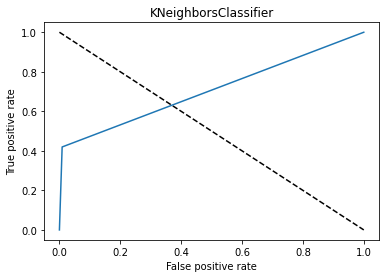

In [477]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')

plt.plot(fpr,tpr,label ='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel( 'True positive rate' )
plt.title('KNeighborsClassifier' )
plt.show()


###### observation:
I used the Label Encoder to make the categorical data into numeric data i.e. Region or date
Also, R2 score value is also greater then accuracy score,Average price, total bags and total volume is well normally distributed data among all other column, As year is most negative co related column among all columns